# Getting Started with BigQuery 

Google BigQuery is a managed, scalable data warehouse that enables analysis over large sets of data.  BigQuery excels in querying and processing very large data sets in a SQL like fashion.  In this lab we will explore how easy it is to use and drive insights from our data using a Python Notebook with BigQuery!

#### Lab: Querying from a Public Dataset
In this lab we will be querying from one of the many [publicly available BigQuery Datasets.](https://cloud.google.com/bigquery/public-data)  Our code blocks below uses `%%bigquery` annotation which magically queries BigQuery and returns data as a Pandas Dataframe.  You can also [use the BigQuery UI as well](https://console.cloud.google.com/bigquery?authuser=1)

Run the code block below to execute our first query and view weather data from the NOAA.

In [42]:
%%bigquery
SELECT * FROM
  `bigquery-public-data.noaa_gsod.gsod*` LIMIT 10

,stn,wban,year,mo,da,temp,count_temp,dewp,count_dewp,slp,...,flag_min,prcp,flag_prcp,sndp,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud
0,038110,99999,1931,11,04,55.2,4,53.6,4,998.9,...,None,99.99,None,999.9,0,1,0,0,0,0
1,030750,99999,1931,05,16,48.2,4,45.0,4,1000.0,...,None,99.99,None,999.9,0,1,0,0,0,0
2,031590,99999,1931,07,06,53.0,4,52.0,4,1008.2,...,None,99.99,None,999.9,1,1,0,0,0,0
3,031590,99999,1931,11,07,47.0,4,46.0,4,997.4,...,None,99.99,None,999.9,0,1,0,0,0,0
4,032620,99999,1931,05,07,47.8,4,45.2,4,1014.1,...,None,99.99,None,999.9,0,1,0,0,0,0
5,037770,99999,1931,03,23,49.5,4,45.0,4,1015.2,...,None,99.99,None,999.9,1,1,0,0,0,0
6,038940,99999,1931,03,10,31.0,4,9999.9,0,9999.9,...,None,99.99,None,999.9,0,0,1,0,0,0
7,039800,99999,1931,08,02,58.8,4,55.8,4,1021.6,...,None,99.99,None,999.9,0,1,0,0,0,0
8,030910,99999,1931,10,16,46.7,4,9999.9,0,1033.1,...,None,0.02,E,999.9,1,0,0,0,0,0
9,030910,99999,1931,11,19,40.5,4,9999.9,0,1007.8,...,*,0.31,E,999.9,0,0,0,0,0,0


This data is useful, but it would be better enriched if we knew the station id's proper name.  The below code block demonstrates joining two data sets together to get a result

In [93]:
%%bigquery
SELECT a.name, a.state, a.country, b.*
FROM `fh-bigquery.weather_gsod.stations` a
JOIN `bigquery-public-data.noaa_gsod.gsod*` b
ON a.usaf=b.stn AND a.wban=b.wban LIMIT 10;

,name,state,country,stn,wban,year,mo,da,temp,count_temp,...,flag_min,prcp,flag_prcp,sndp,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud
0,ARGOS 3781,None,**,990061,99999,1929,10,29,67.2,24,...,*,0.0,I,999.9,0,0,0,0,0,0
1,ARGOS 3781,None,**,990061,99999,1929,11,07,69.0,24,...,*,0.0,I,999.9,0,0,0,0,0,0
2,ARGOS 3781,None,**,990061,99999,1929,11,10,66.0,24,...,*,0.0,I,999.9,0,0,0,0,0,0
3,ARGOS 3781,None,**,990061,99999,1929,11,11,62.6,24,...,*,0.0,I,999.9,0,0,0,0,0,0
4,ARGOS 3781,None,**,990061,99999,1929,11,12,64.1,24,...,*,0.0,I,999.9,0,0,0,0,0,0
5,ARGOS 3781,None,**,990061,99999,1929,11,13,66.6,24,...,*,0.0,I,999.9,0,0,0,0,0,0
6,ARGOS 3781,None,**,990061,99999,1929,11,14,69.6,24,...,*,0.0,I,999.9,0,0,0,0,0,0
7,ARGOS 3781,None,**,990061,99999,1929,11,15,69.7,24,...,*,0.0,I,999.9,0,0,0,0,0,0
8,ARGOS 3781,None,**,990061,99999,1929,11,18,66.4,24,...,*,0.0,I,999.9,0,0,0,0,0,0
9,ARGOS 3781,None,**,990061,99999,1929,11,19,65.0,24,...,*,0.0,I,999.9,0,0,0,0,0,0


Lastly during this lab, to emphasize how big our data sets are, we will do a count on the dataset.  Run the code block below to see how quickly BigQuery can handle very large datasets.

In [92]:
%%bigquery
SELECT count(1) FROM
  `bigquery-public-data.noaa_gsod.gsod*`

,f0_
0,40638238



#### Lab: Gaining Insights From Our Data
In this section we will perform some advanced querying to find the average daily temperature by month, for a specific municipality.  We will use AVG() and GROUP BY to find the average. 

In [157]:
%%bigquery
SELECT a.name, b.mo, AVG(temp) as Temp_f
FROM `fh-bigquery.weather_gsod.stations` a
JOIN `bigquery-public-data.noaa_gsod.gsod201*` b
ON a.usaf=b.stn AND a.wban=b.wban 
WHERE a.state = 'CA' AND a.name = 'SAN FRANCISCO INTL'
GROUP BY a.name, b.mo
ORDER BY b.mo asc;

,name,mo,Temp_f
0,SAN FRANCISCO INTL,01,51.810968
1,SAN FRANCISCO INTL,02,53.218085
2,SAN FRANCISCO INTL,03,55.041935
3,SAN FRANCISCO INTL,04,56.756333
4,SAN FRANCISCO INTL,05,58.180968
5,SAN FRANCISCO INTL,06,61.387000
6,SAN FRANCISCO INTL,07,62.364839
7,SAN FRANCISCO INTL,08,62.926774
8,SAN FRANCISCO INTL,09,63.974667
9,SAN FRANCISCO INTL,10,62.460968


Now its your turn! Change the state and name to a different municipality to find your own insights!
**Hint:** You can use the this query to find weather stations in a different state.
```%%bigquery avg_temperature
SELECT DISTINCT a.name
FROM `fh-bigquery.weather_gsod.stations` a
JOIN `bigquery-public-data.noaa_gsod.gsod*` b
ON a.usaf=b.stn AND a.wban=b.wban 
WHERE a.state = 'MI' LIMIT 10;
```

Next we will visualize our data right here in the Python Notebook using the magic command `%matplotlib inline`.  For this example we will find the average temperature by month for the State of Alaska. First run the BigQuery query below to save the results into a Pandas Dataframe called `avg_temperature` to be made available in the following code block.

In [119]:
%%bigquery avg_temperature
SELECT a.state, b.mo, AVG(temp) as Temp_f
FROM `fh-bigquery.weather_gsod.stations` a
JOIN `bigquery-public-data.noaa_gsod.gsod201*` b
ON a.usaf=b.stn AND a.wban=b.wban 
WHERE a.state = 'AK'
GROUP BY a.state, b.mo
ORDER BY b.mo asc;

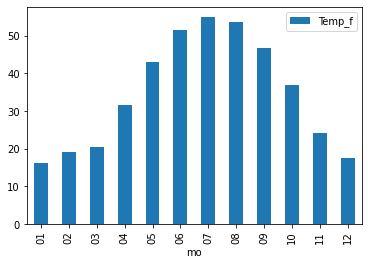

In [120]:
%matplotlib inline
avg_temperature.plot(kind='bar', x='mo', y='Temp_f');


**First:** Modify the query above to find the average precipitation for Alaska (AK) throughout the year.

**Second:** Change the query above to find results for your favorite city, and state!

### Using Python to drive insights in BigQuery

BigQuery also has an extensive Python library that you can draw from. Below is an example from before this time querying the dataset using Python.
This time we will find the top 5 warmest average, and bottom 5 coolest average weather stations.

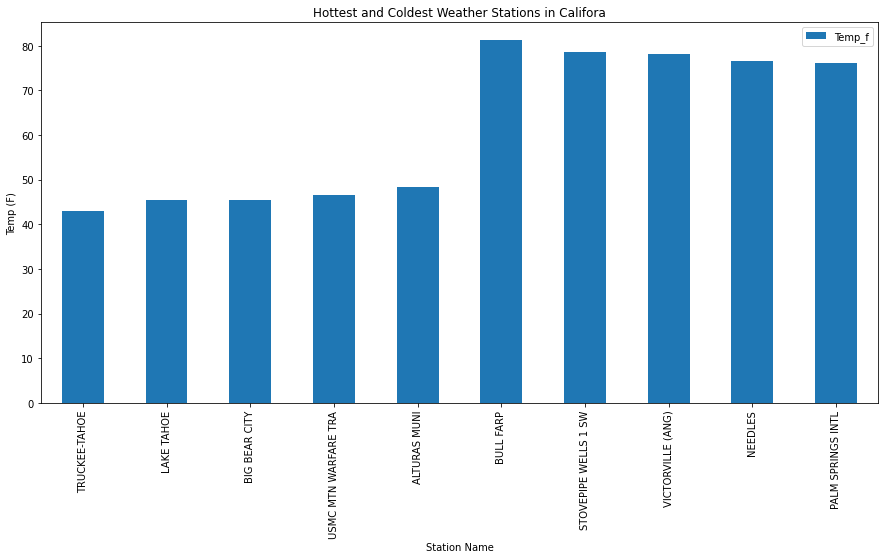

In [112]:
import pandas as pd

from google.cloud import bigquery
client = bigquery.Client()

sql = """
SELECT a.name, AVG(temp) as Temp_f
FROM `fh-bigquery.weather_gsod.stations` a
JOIN `bigquery-public-data.noaa_gsod.gsod201*` b
ON a.usaf=b.stn AND a.wban=b.wban 
WHERE a.state = 'CA' 
GROUP BY a.name
ORDER BY Temp_f desc LIMIT 5;
"""
df_desc = client.query(sql).to_dataframe()

sql = """
SELECT a.name, AVG(temp) as Temp_f
FROM `fh-bigquery.weather_gsod.stations` a
JOIN `bigquery-public-data.noaa_gsod.gsod201*` b
ON a.usaf=b.stn AND a.wban=b.wban 
WHERE a.state = 'CA' 
GROUP BY a.name
ORDER BY Temp_f asc LIMIT 5;
"""
df_asc = client.query(sql).to_dataframe()

frames = [df_asc, df_desc]
result = pd.concat(frames)
ax = result.plot(kind='bar', x='name', y='Temp_f', figsize=(15,7))
ax.set_title('Hottest and Coldest Weather Stations in Califora')
ax.set_xlabel('Station Name')
ax.set_ylabel('Temp (F)');


BigQuery, Python and Dataframes also supports other powerful techniques such as pivot tables. Pivot tables allow a summary of the data in a more advanced format featuring averages, sums, counts, and other statistics.  This example below takes the average temperature data and displays it in both graph and table form for multiple states.

Temp_f                      
state         AK         CA         MI
year                                  
1991   33.289800  61.216244  46.743736
1992   31.196912  62.926264  44.669896
1993   34.533585  61.541455  44.209930
1994   31.042109  61.090273  44.942223
1995   32.276203  62.169747  44.710609
1996   29.805031  62.774709  42.059143
1997   33.764069  63.287292  45.116932
1998   33.467007  60.326957  49.474451
1999   29.069615  60.378225  48.944297
2000   32.766118  61.427812  46.646859
2001   32.813517  60.993666  48.457445
2002   34.866833  60.475270  47.082348
2003   34.223131  61.561514  44.930823
2004   34.511489  61.472965  45.900295
2005   33.864994  61.184128  46.963643
2006   31.280494  60.658953  47.808620
2007   33.088656  60.143209  46.741280
2008   30.382968  59.973293  44.874703
2009   32.420543  59.529664  44.799881
2010   33.149706  58.629544  47.764309
2011   33.007278  58.126452  46.384422
2012   30.337357  59.590132  49.338289
2013   33.986073  59.603633  44.914956
2014   36.390893  62.389326  42.868228
2015   35.645221  61.921262  45.791259
2016   37.570062  61.221792  48.111598
2017   35.006446  61.310107  46.820420
2018   34.602377  61.000531  42.702876
2019   38.001064  60.242119  44.809105

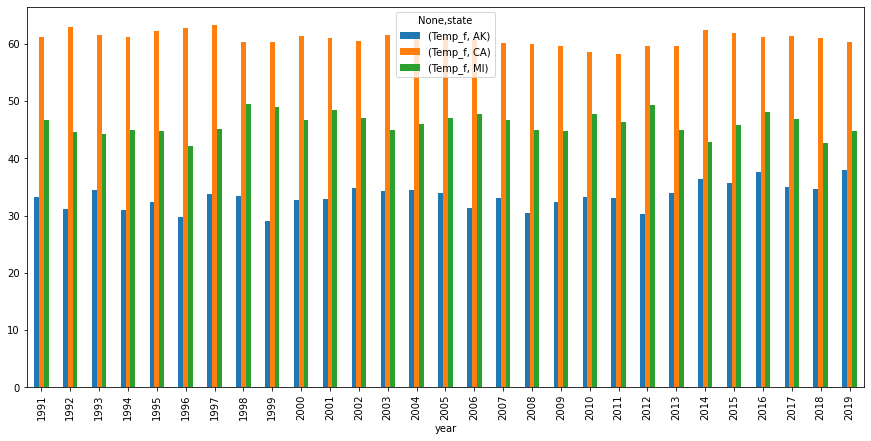

In [171]:
import pandas as pd

from google.cloud import bigquery
client = bigquery.Client()

sql = """
SELECT AVG(b.temp) as Temp_f, b.year, a.state
FROM `fh-bigquery.weather_gsod.stations` a
JOIN `bigquery-public-data.noaa_gsod.gsod*` b
ON a.usaf=b.stn AND a.wban=b.wban 
WHERE a.country='US' AND a.state IN ('MI','CA','AK') AND b.year > '1990' AND b.year < '2020'
Group By b.year, a.state
"""

df = client.query(sql).to_dataframe()
pivot_table = pd.pivot_table(df, index=['year'], columns=['state'], values=['Temp_f'])
pivot_table.plot(kind='bar', figsize=(15, 7));
display(pivot_table)

Modify the Python code above to find your own insights in the NOAA dataset!